This notebook presents an end-to-end data analysis project using the Superstore dataset. It covers sales trends, top-performing categories, regional performance, and customer insights using Python(pandas,matplotlib,seaborn).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize']=(12,6)
df=pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv',encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.columns=df.columns.str.strip()
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [3]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Total Profit by Category**

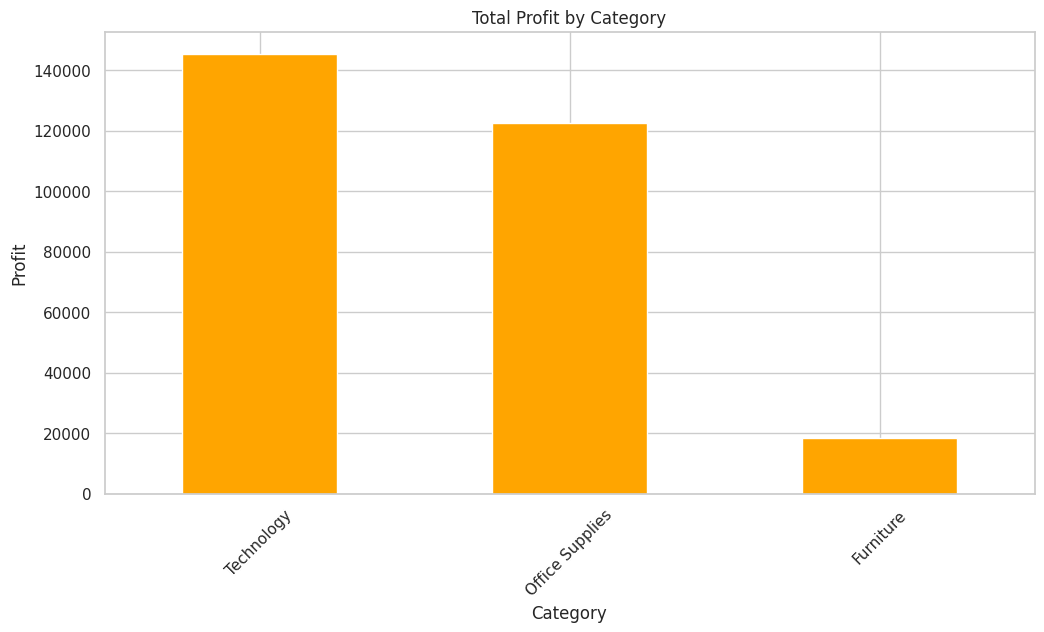

In [4]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Total Profit by Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


**Top 10 Cities by Sales**

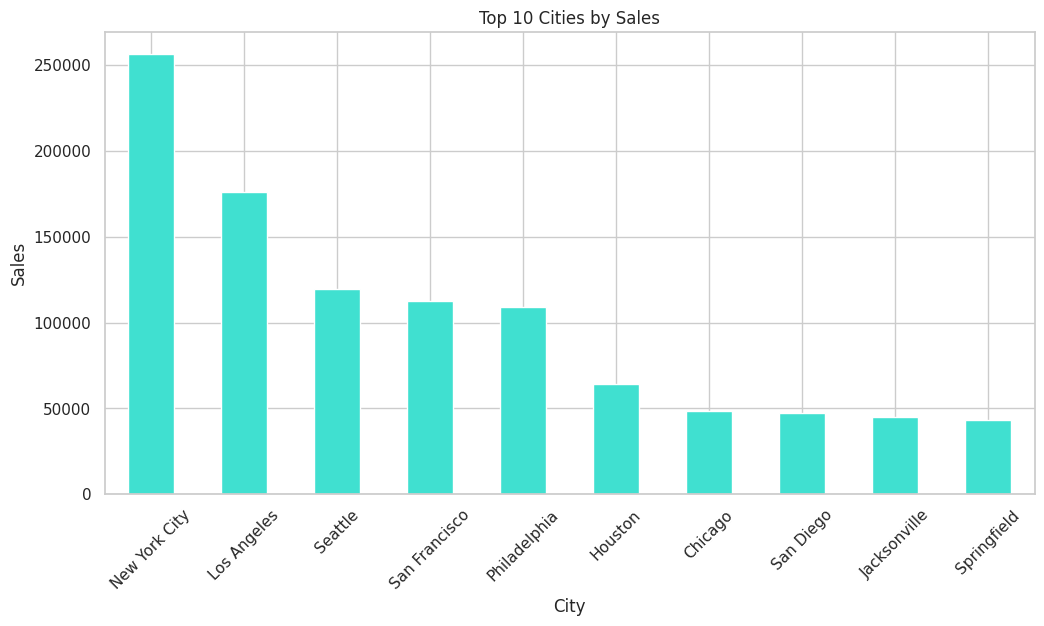

In [5]:
df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='turquoise')
plt.title('Top 10 Cities by Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


**Monthly Sales Trend**

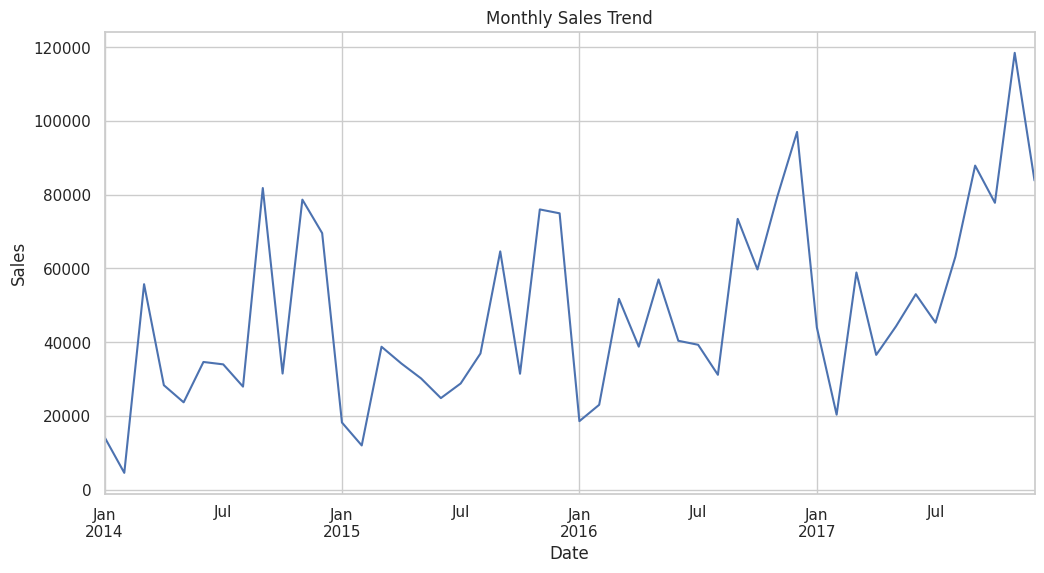

In [6]:
monthly_sales = df.resample('ME', on='Order Date')['Sales'].sum()

monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


**Profit vs Discount Analysis**

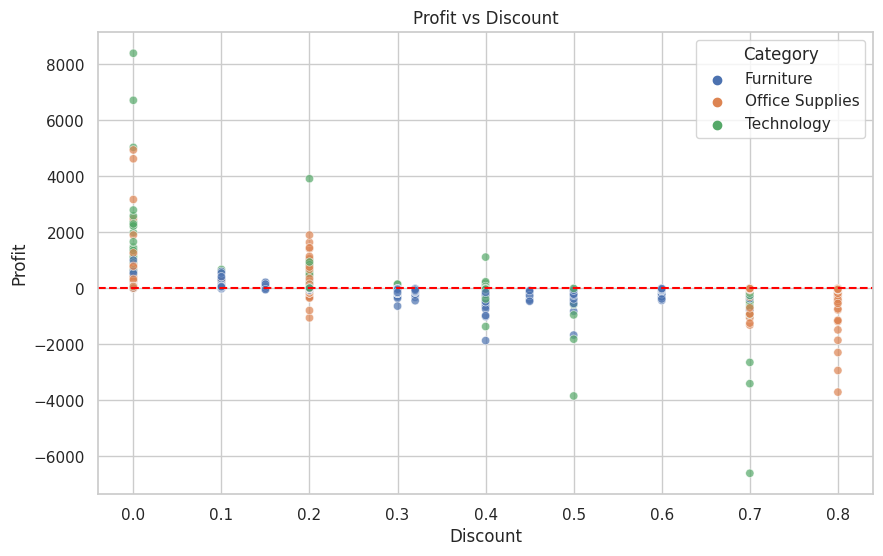

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='red', linestyle='--')
plt.show()


**Sales by Customer Segment**

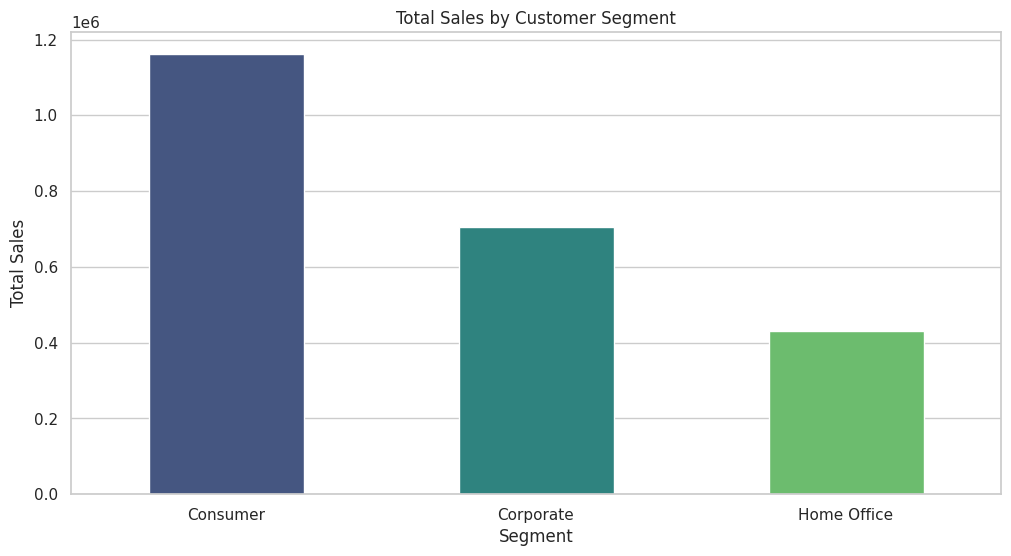

In [8]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

sns.barplot(x=segment_sales.index, y=segment_sales.values, palette='viridis',width=0.5)
plt.title('Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.xlabel('Segment')
plt.show()


**Sub-Category Heatmap(Sales vs Profit)**

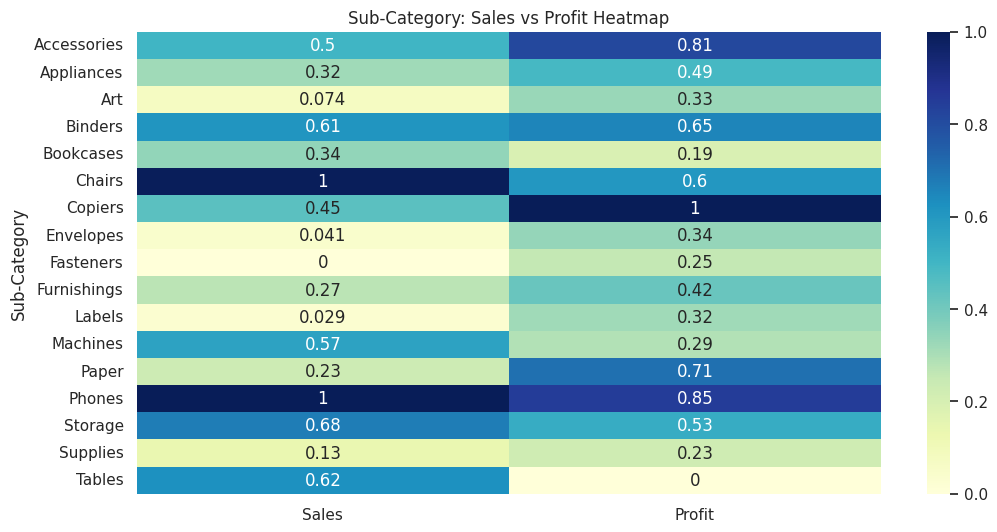

In [9]:
subcat_summary = df.groupby('Sub-Category')[['Sales', 'Profit']].sum()

subcat_normalized = subcat_summary.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

sns.heatmap(subcat_normalized, annot=True, cmap='YlGnBu')
plt.title('Sub-Category: Sales vs Profit Heatmap')
plt.show()


## Analysis Summary & Insights

1. **Total Profit by Category:**
Technology category shows the highest profit margin, while Furniture has the lowest. This could be due to either lower sales volume or higher costs.

2. **Top 10 Cities by Sales:**
New York and Los Angeles are leading in total sales. These cities might be ideal targets for regional marketing campaigns.

3. **Monthly Sales Trend:**
Sales tend to peak in November and December, likely due to seasonal shopping trends and holiday promotions.

4. **Profit vs Discount Analysis:**
There's a clear negative correlation between high discounts and profit, indicating a need to reassess the discount strategy.

5. **Sales by Customer Segment:**
Consumer segment contributes the most to total sales, but the Corporate segment offers better profitability per sale.

6. **Sub-Category Heatmap (Sales vs Profit):**
Sub-categories like Chairs and Phones are profitable, while Tables and Bookcases show high sales but negative profit.


## Recommendations

- Reduce discounts for low-margin categories.
- Focus sales strategies on top-performing cities and sub-categories.
- Consider improving delivery times or cost in unprofitable shipping methods.